# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [ ]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

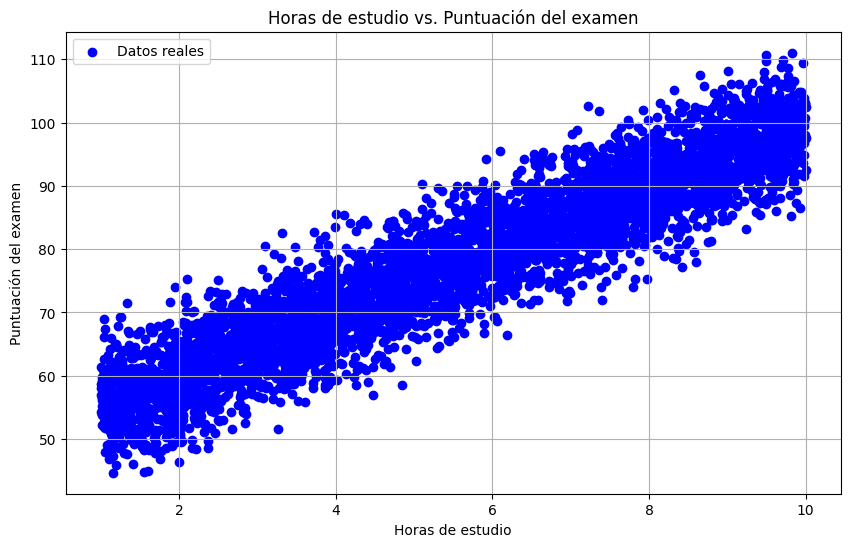

In [ ]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# A COMPLETAR

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])

Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [ ]:
import numpy as np

# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    n = len(y_true)
    cost = np.sum((y_true - y_pred) ** 2) / n
    return cost

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):

    # 1. Inicializar los coeficientes (pesos) w y b
    w = 10
    b = 10

    # 2. bucle que itere por epoch
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # 3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred_train = X_train * w + b
        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # 5. Calcular los gradientes para los pesos w y b
        dw = (-2 / len(X_train)) * sum(X_train * (y_train - y_pred_train))
        db = (-2 / len(X_train)) * sum(y_train - y_pred_train)

        # 6. Actualizar los pesos w y b
        w -= lr * dw
        b -= lr * db

        # 7. Calcular y_pred del conjunto de validación por epoch
        y_pred_val = X_val * w + b
        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)


    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [ ]:
# Hiperparámetros
lr = 0.01
epochs = 100

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

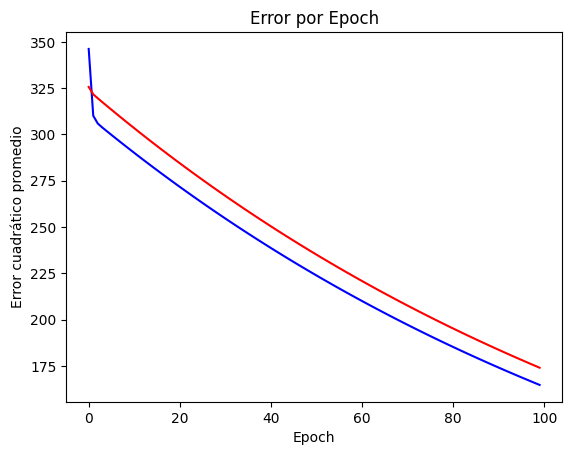

In [ ]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 174.98805429904903


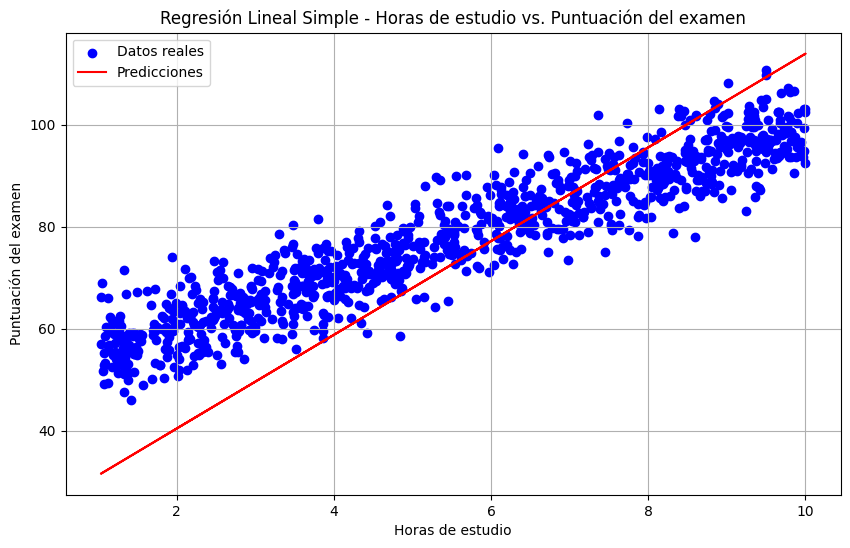

In [ ]:
# Realizar predicciones en test
y_pred = np.dot(X_test, w) + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)


MSE en el conjunto de test: 174.98805429904903
MAE en el conjunto de test: 11.11074927224909
R^2 en el conjunto de test: 0.12207687670216871
MAPE en el conjunto de test: 15.584389643843084


## Implementación de la regresión lineal usando sklearn

In [ ]:
X_train_reshaped = X_train.reshape(-1, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_reshaped, y_train)

LinearRegression()

Costo del modelo: 25.24963738333083


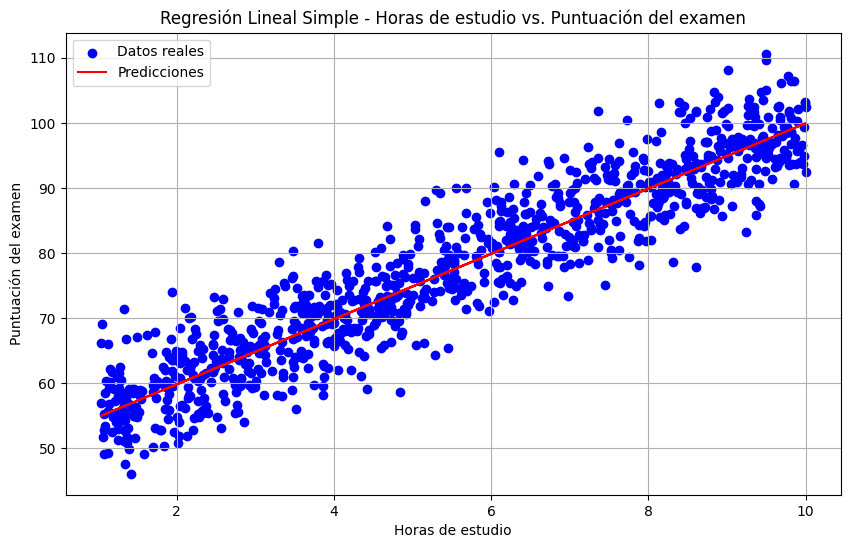

In [ ]:
# Realizar predicciones en test
y_pred = model.predict(X_test.reshape(-1, 1))

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = model.predict(X_train.reshape(-1, 1))

# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)


MSE en el conjunto de entrenamiento: 23.437293509479943
MAE en el conjunto de entrenamiento: 3.829111436954274
R^2 en el conjunto de entrenamiento: 0.8770641646391161
MAPE en el conjunto de entrenamiento: 5.15029592425338


## Comparación de parámetros obtenidos



In [ ]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 22.047393810660616
Coeficiente de pendiente (w) - Manual: 9.1868622244472
Coeficiente de intercepción (b) - Scikit-learn: 49.793769346749876
Coeficiente de pendiente (w) - Scikit-learn: 5.014015542462287


## Conclusión

En este ejercicio, implementamos una regresión lineal utilizando el método de descenso del gradiente y comparamos los resultados con la implementación de la librería sklearn. Dividimos el conjunto de datos en tres partes: 3000 datos de entrenamiento, 1000 de validación y 1000 de prueba.

La implementación manual ha resultado en un MSE de 174.99 en el conjunto de prueba, indicando una diferencia notable respecto al MSE de 23.44 en el conjunto de entrenamiento, sugiriendo posible sobreajuste. Además, el valor de R² en el conjunto de prueba es bajo (0.122), mientras que en el conjunto de entrenamiento es alto (0.877), reforzando la hipótesis del sobreajuste.

En resumen, aunque ambos métodos logran ajustar un modelo de regresión lineal, la implementación de sklearn ofrece una mayor estabilidad y precisión en los coeficientes obtenidos. Comparando las métricas observamos que el modelo de sklearn es más robusto y generaliza mejor los datos de prueba.